<a href="https://colab.research.google.com/github/sayonaramagalhaes/Atividade-ML---terceira/blob/main/Visualiza%C3%A7oes_Gr%C3%A1ficas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

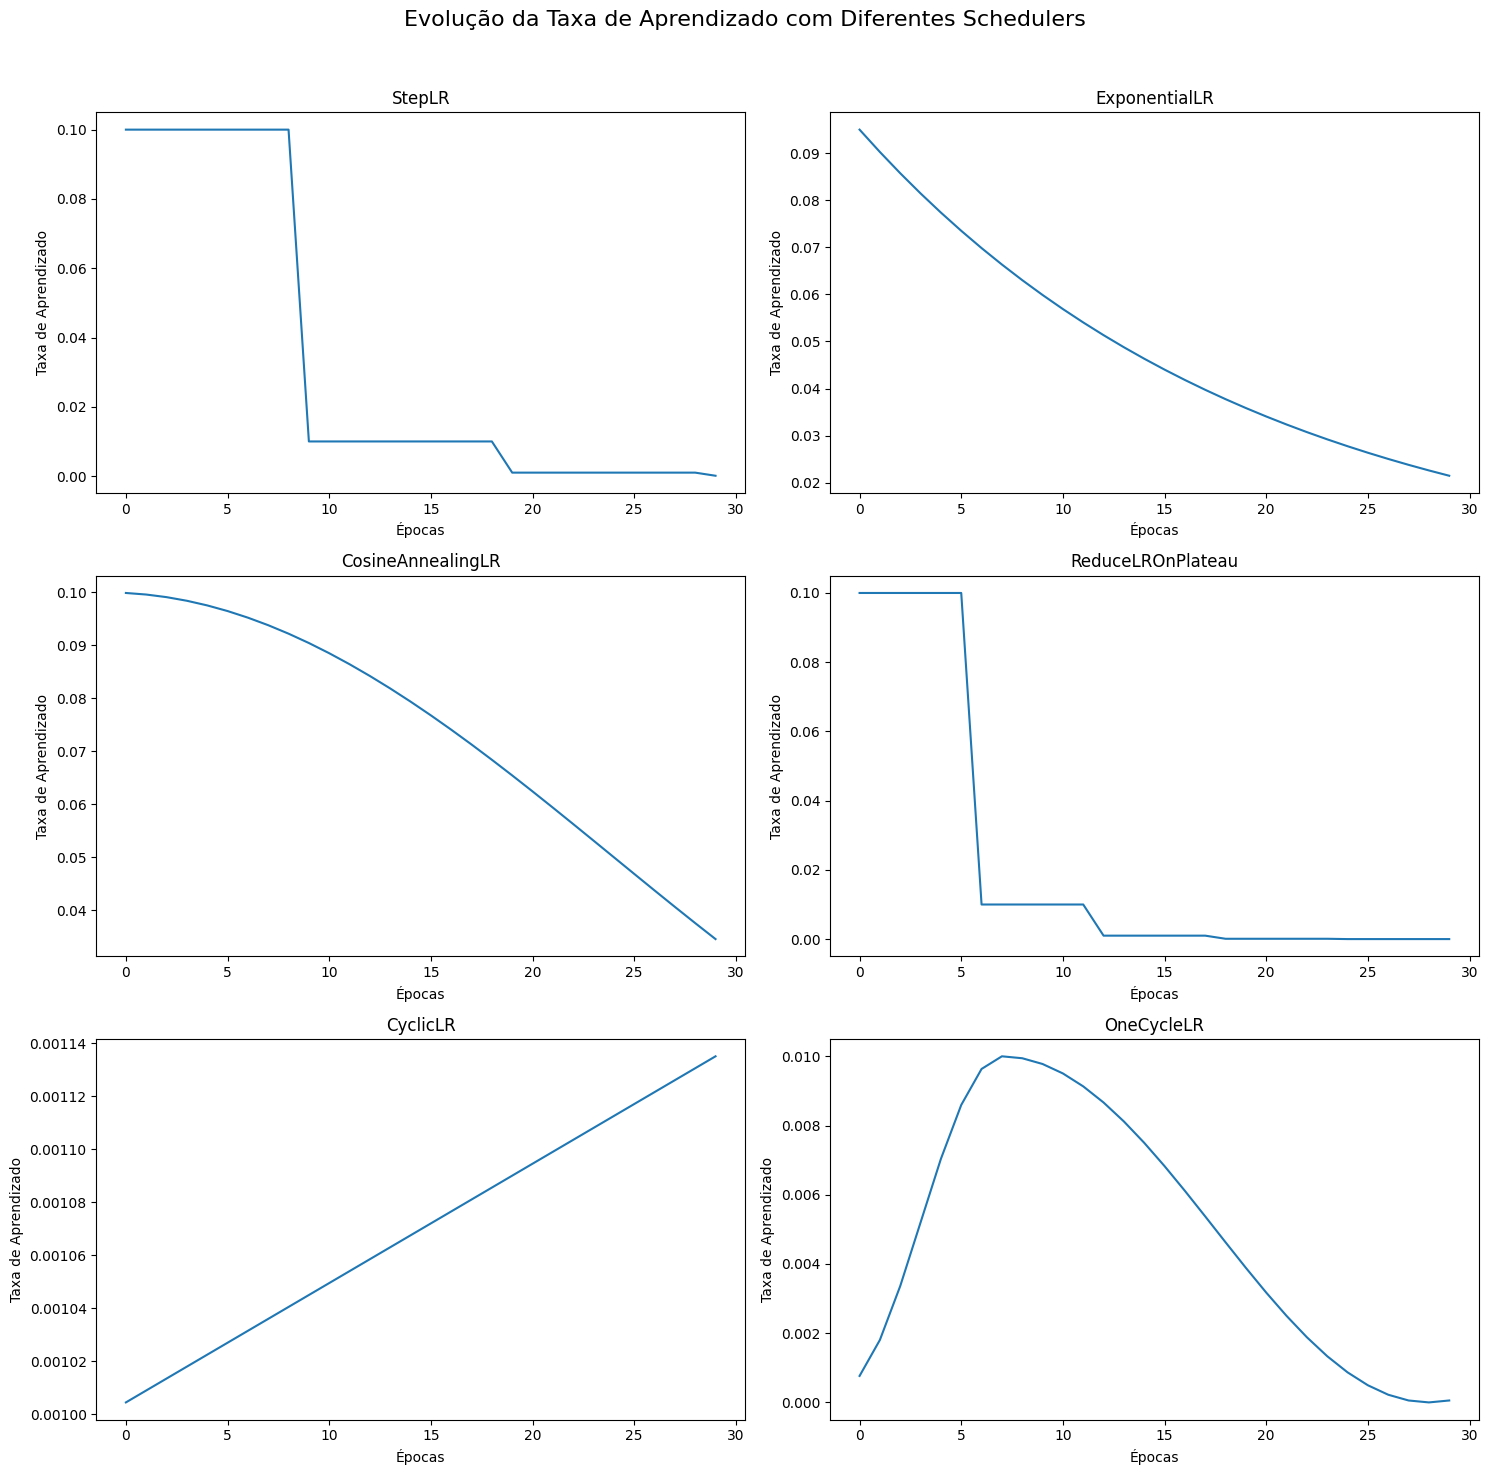

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

# Definir um modelo simples
model = nn.Linear(1, 1)


fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Evolução da Taxa de Aprendizado com Diferentes Schedulers', fontsize=16)


def plot_scheduler(scheduler, optimizer, ax, title):
    lrs = []
    for epoch in range(30):
        optimizer.step()
        scheduler.step()
        lrs.append(optimizer.param_groups[0]['lr'])
    ax.plot(lrs)
    ax.set_title(title)
    ax.set_xlabel('Épocas')
    ax.set_ylabel('Taxa de Aprendizado')

# 1. StepLR
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler_step = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
plot_scheduler(scheduler_step, optimizer, axs[0, 0], 'StepLR')

# 2. ExponentialLR
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler_exp = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
plot_scheduler(scheduler_exp, optimizer, axs[0, 1], 'ExponentialLR')

# 3. CosineAnnealingLR
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler_cosine = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50, eta_min=0)
plot_scheduler(scheduler_cosine, optimizer, axs[1, 0], 'CosineAnnealingLR')

# 4. ReduceLROnPlateau
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler_plateau = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)
lrs_plateau = []
for epoch in range(30):
    optimizer.step()
    loss = 0.5 + 0.01 * epoch
    scheduler_plateau.step(loss)
    lrs_plateau.append(optimizer.param_groups[0]['lr'])
axs[1, 1].plot(lrs_plateau)
axs[1, 1].set_title('ReduceLROnPlateau')
axs[1, 1].set_xlabel('Épocas')
axs[1, 1].set_ylabel('Taxa de Aprendizado')

# 5. CyclicLR
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler_cyclic = optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.01, step_size_up=2000, step_size_down=4000)
plot_scheduler(scheduler_cyclic, optimizer, axs[2, 0], 'CyclicLR')

# 6. OneCycleLR
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler_one_cycle = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, total_steps=30, pct_start=0.3)
plot_scheduler(scheduler_one_cycle, optimizer, axs[2, 1], 'OneCycleLR')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
